# **Bank Marketing Campaign Effectiveness Prediction Model**

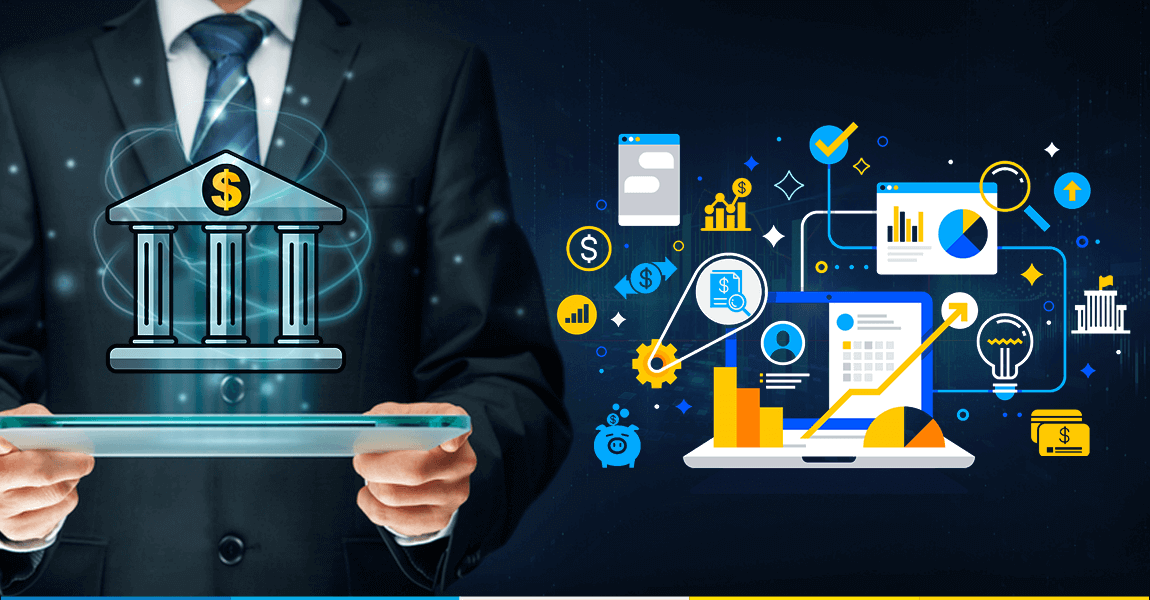

# Business Understanding

### Context

Term deposits are a popular financial product where customers deposit money in a bank for a fixed period .Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits. To stay competitive and attract new customers, banks often run marketing campaigns to offer this term deposit product.

### Problem Statement

A bank wants to improve the effectiveness of its marketing campaigns by predicting whether a customer will invest to a term deposit based on a range of customer attributes and past marketing interactions. 

### Goal

The project aims to build a classification model using historical data, which contains features such as customer demographics and previous campaign results to predict the likelihood of investment to term deposits. The key target variable is whether a customer subscribed to a term deposit (binary outcome: yes or no).

### Analytical Approach

1. **Data Preparation**:
    - Clean and preprocess the dataset, handling missing values and outliers.
    - Encode categorical variables and scale numerical features as necessary.

2. **Classification Modeling**:
    - Split the dataset into training and testing sets to evaluate model performance.
    - Use classification algorithms (e.g., logistic regression, decision trees, random forests, or gradient boosting).
    - Train the selected classification models on the training set and validate their performance on the testing set.

### Metric Evaluation

We use **F1-Score** as a main evaluation metric. F1 score is an evaluation metric that combines precision and recall in one value, to assess the performance of a classification model. By using the F1-score as an evaluation metric, **the bank can gain a clearer understanding of how well the model predicts customers likely to subscribe to term deposits**. 

F1 Score helps minimizing the False Positives and False Negatives the accuracy and sensitivity of the model, ensuring that marketing campaigns can be effectively targeted toward potential subscribers.

**False Positive** : A false positive occurs when the model predicts that a customer will invest to a term deposit, but in reality, they don’t.

**False Negative** : A false negative occurs when the model predicts that a customer will not invest to a term deposit, but in reality, they do.

# Import Libraries

In [1]:
# Main Module
import pandas as pd
import numpy as np

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Imputer
from sklearn.impute import SimpleImputer, KNNImputer

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Splitting, tuning parameter, & cross validation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, mean_squared_error, recall_score, precision_score, f1_score, precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, classification_report, roc_auc_score

# Feature Selection
from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Handling Imbalance 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Pickle
import pickle

import time
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Data Understanding

In [2]:
df=pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [3]:
df.shape

(7813, 11)

The dataset contains 77813 rows and 11 columns. Each row represents an individual customer, along with their personal and marketing information, which is used to determine whether or not they subscribed to a term deposit (denoted by the deposit column). Here's a breakdown of what each row represents based on the columns:

| Column     | Description                                                                 |
|------------|-----------------------------------------------------------------------------|
| age        | The age of the customer.                                                    |
| job        | The customer's occupation (e.g., admin., self-employed, services, housemaid).|
| balance    | The account balance (in monetary units) of the customer.                    |
| housing    | Whether the customer has a housing loan (yes/no).                           |
| loan       | Whether the customer has a personal loan (yes/no).                          |
| contact    | The contact communication type used in the campaign (e.g., cellular, telephone).|
| month      | The last contact month of the year during the marketing campaign.            |
| campaign   | The number of contacts performed during this campaign for this customer.     |
| pdays      | The number of days since the customer was last contacted in a previous campaign (-1 indicates no prior contact). |
| poutcome   | The outcome of the previous marketing campaign (e.g., success, failure, other, unknown). |
| deposit    | Whether the customer subscribed to a term deposit (yes/no).                 |


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


**Insights :**

There are 7813 entries in the train dataset. All columns has 7813 non null values, which means most likely there are no missing values present. Also, there are int64 and object data types features present.

**Features Overview :**
- **Numerical Features** : age, balance, campaign, and pdays.
- **Ctaegorical Features** : job, housing, loan, contact, month, poutcome, and deposit.

In [5]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


**Insights :**

- Age: Customers range in age from 18 to 95 years, with a mean age of approximately 41 years.
- Balance: The average yearly balance is around 1512. The balance ranges from -6847 to 66653.
- Campaign: On average, a client was contacted approximately 2.5 times during this campaign.
- Pdays: A significant number of customers have a value of -1 for ‘pdays’, indicating they were not contacted before this campaign.

In [6]:
df.describe(include='object')

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


**Insights :**
- Job: The most common job category is ‘management’.
- Housing: A majority of the customers didn't have a housing loan.
- Loan: Most clients don't have a personal loan.
- Contact: The most common communication type is ‘cellular’.
- Month: May is the month with the highest number of last contacts.
- Poutcome: The outcome of the previous campaign is mostly ‘unknown’.
- Deposit (Label): The majority of customers haven't subscribed to a term deposit.

In [7]:
# check null/missing values
pd.set_option('display.max_colwidth', None)

list_item = []
for col in df.columns :
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), df[col].unique()]);

df_desc = pd.DataFrame(columns=['data_features', 'data_type', 'n_null', '% null', 'n_unique', 'unique_values'],
                     data=list_item)
df_desc

,data_features,data_type,n_null,% null,n_unique,unique_values
0,age,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,object,0,0.0,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,object,0,0.0,2,"[no, yes]"
4,loan,object,0,0.0,2,"[no, yes]"
5,contact,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,object,0,0.0,4,"[unknown, other, failure, success]"


**Insights :**

There are no missing values found, however, there are 'unknown' values ​​in several categoricals columns such as job, contact and poutcome. We could treat the 'unknown' values as missing values.

In [8]:
df.duplicated().sum()

8

**Insights :**

There are 8 duplicated datas found in the train dataset.

# Exploratory Data Analysis (EDA)

## Numerical Features Analysis

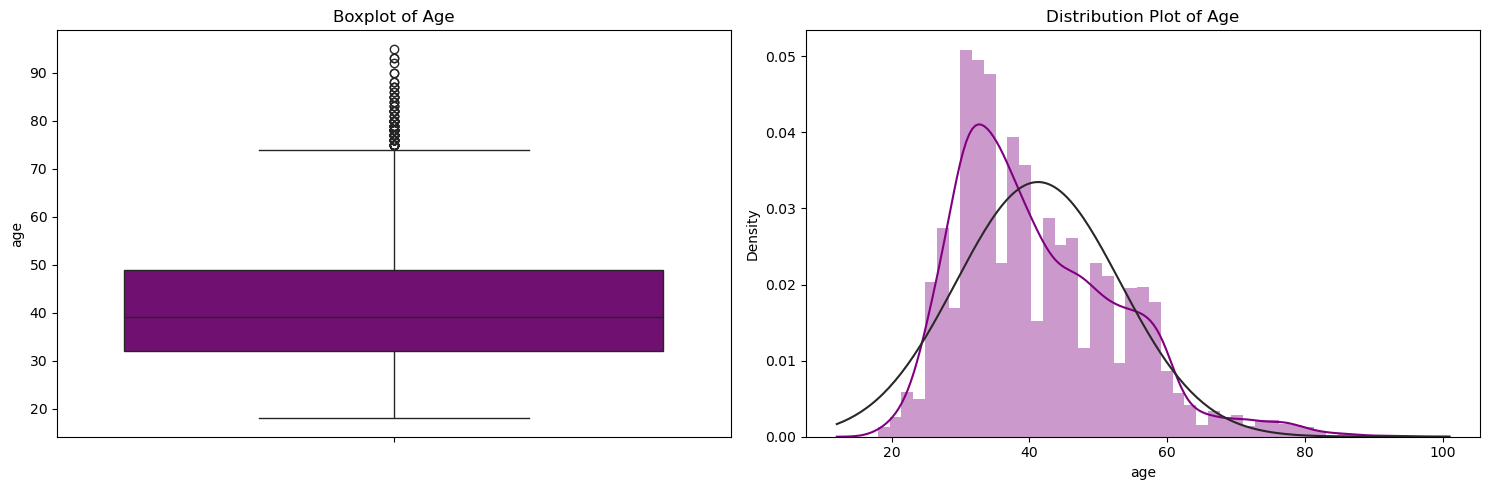

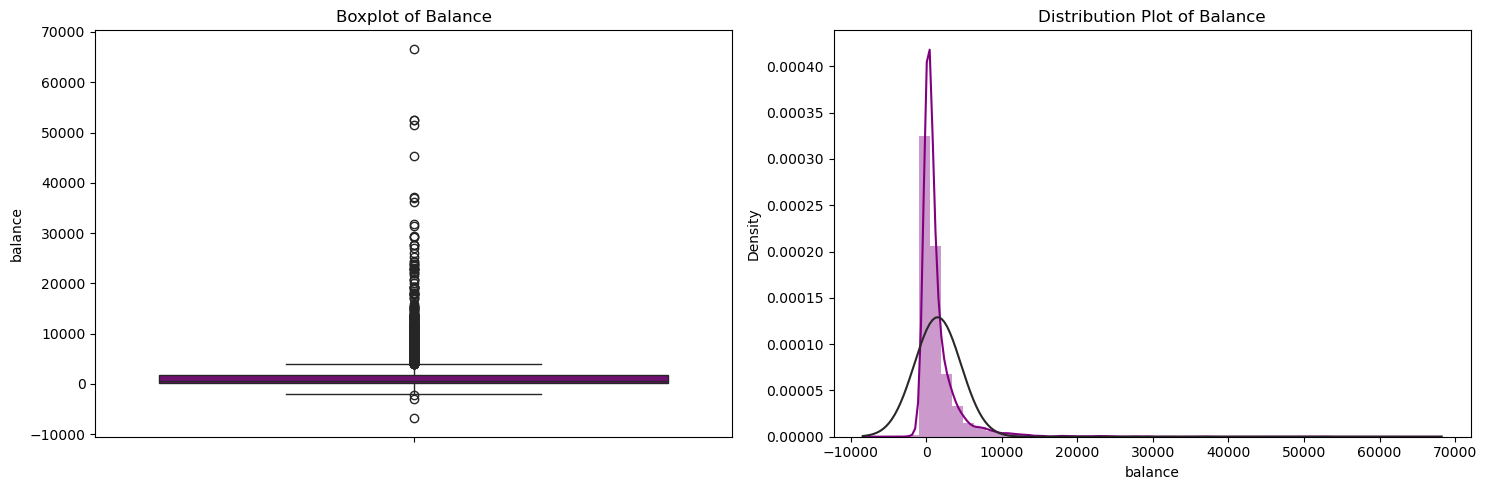

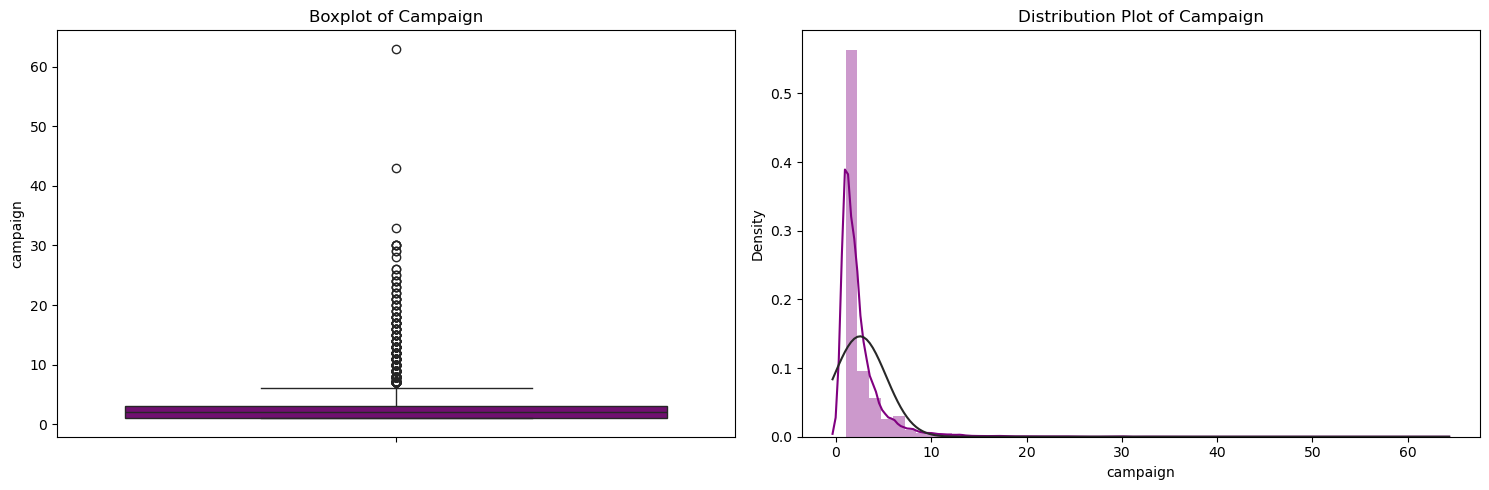

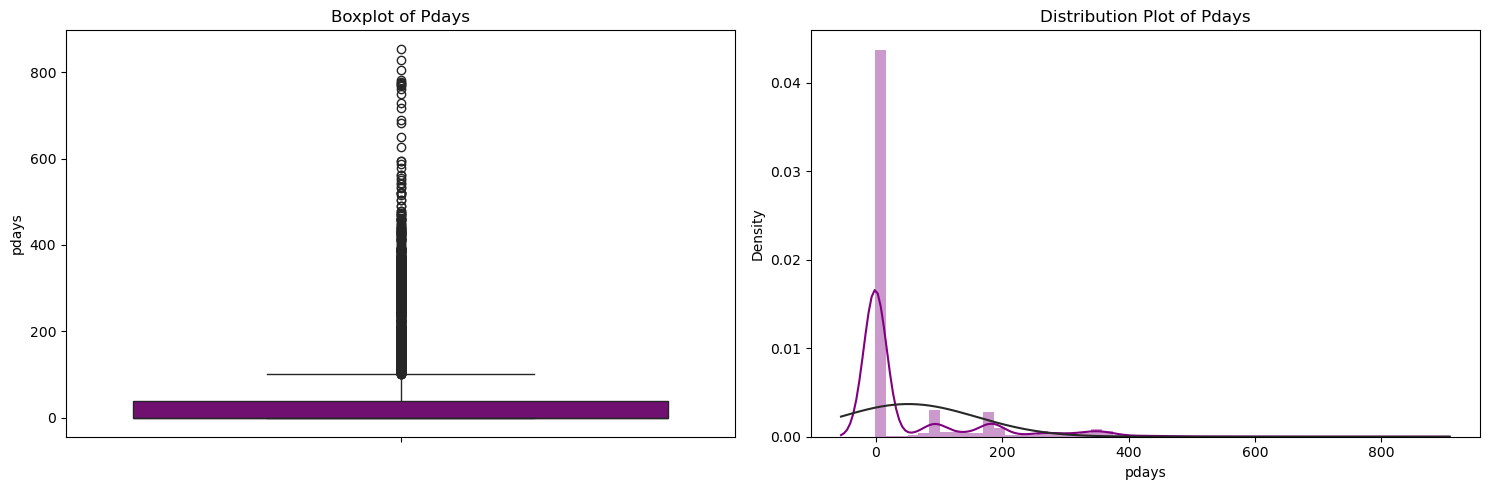

In [9]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

numeric_feat=df.select_dtypes(include='number').columns

# Plotting Box and Distribution plot using for loop
for feat in numeric_feat:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[feat],color='purple')
    ax.set_title(f'Boxplot of {feat.title()}')
    ax.set_ylabel(feat)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[feat], fit=norm,color='purple')
    ax.set_title(f'Distribution Plot of {feat.title()}')
    ax.set_xlabel(feat)

    plt.tight_layout()
    plt.show()

**Insights :**
1. **Age**
   - The age distribution appears to be centered between 30 and 50, with the median age around 40. There are a few outliers above 70, indicating some older individuals in the dataset.
   - The age distribution is skewed to the right (positive skewness), with most individuals concentrated between 20 and 60 years. 
2. **Balance**
   - The balance has a lot of outliers, with some values above 40,000. Most of the data is clustered near the lower end, and the interquartile range (IQR) suggests that the majority of customers have balances between -500 and around 1,000.
   - The balance distribution is highly right-skewed, with a large number of values near zero and a long tail extending towards larger balances. A significant portion of the customers have low or negative balances.
3. **Campaign**
    - The boxplot shows that the majority of the data is clustered around low campaign values (around 1 to 3), with many outliers going up to 60 contacts. Most customers have been contacted less than 10 times.
    - The campaign distribution is heavily right-skewed, indicating that most customers have been contacted only a few times (around 1-3 times), and a few customers have been contacted many times. The plot shows a steep drop in density as the number of contacts increases.
4. **Pdays**
    - The boxplot shows a similar pattern to campaign, with most values clustered near zero and many outliers extending beyond 800. This indicates that most customers had not been contacted for a long time, but there are a few who were contacted within 800 days of the last campaign.
    - The distribution of pdays is extremely right-skewed. A large spike near zero suggests that most customers were contacted recently, with a long tail extending up to 800 days, showing that some customers were contacted much earlier.

## Categorical Features Analysis

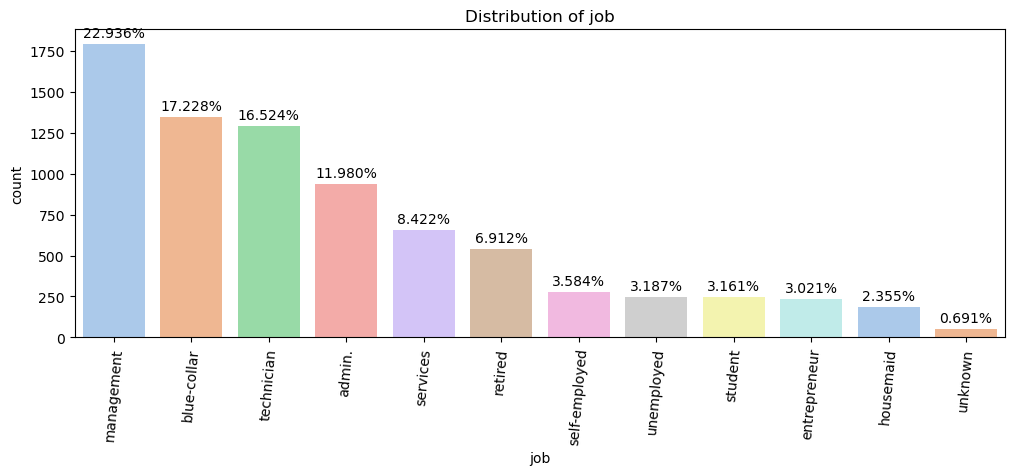

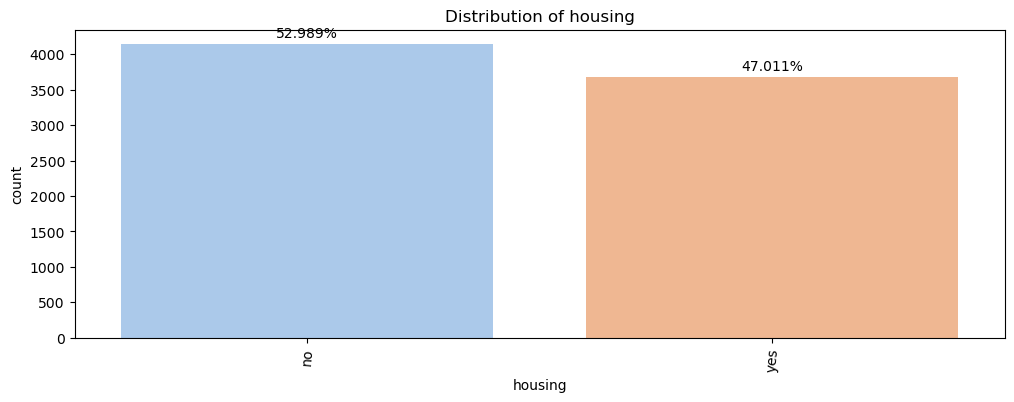

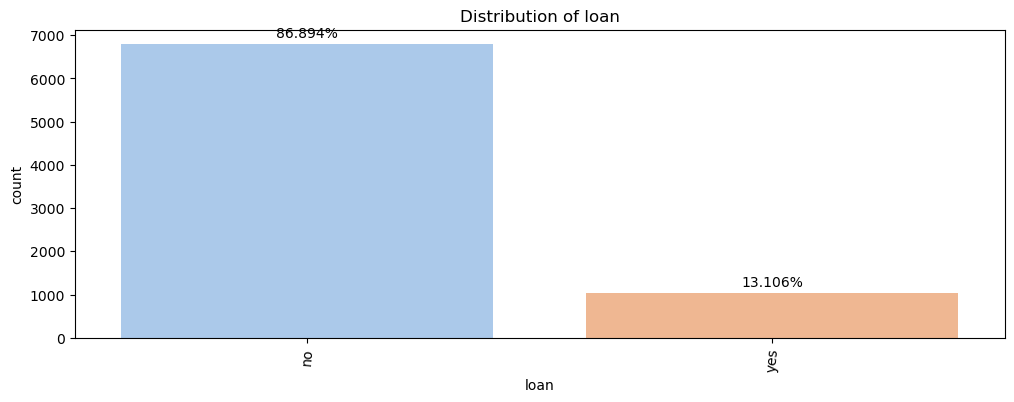

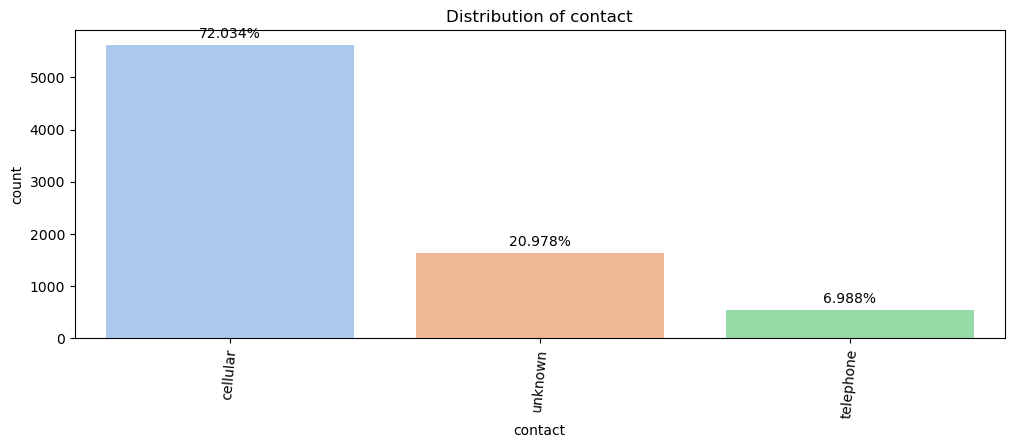

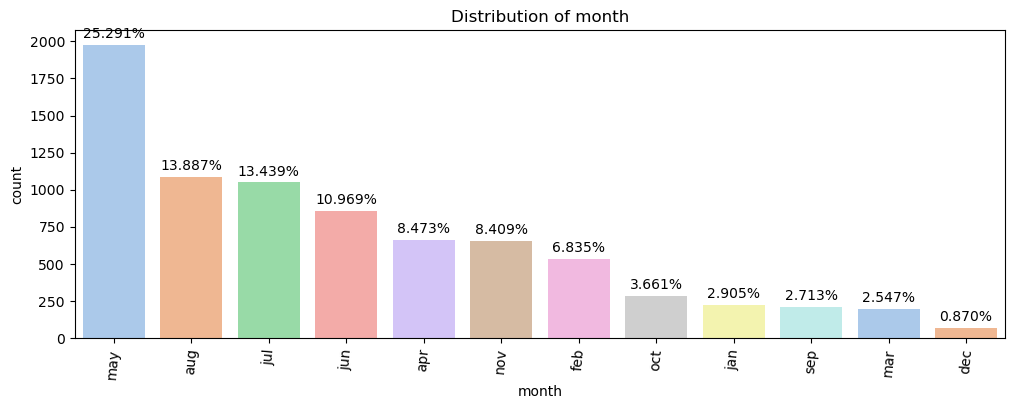

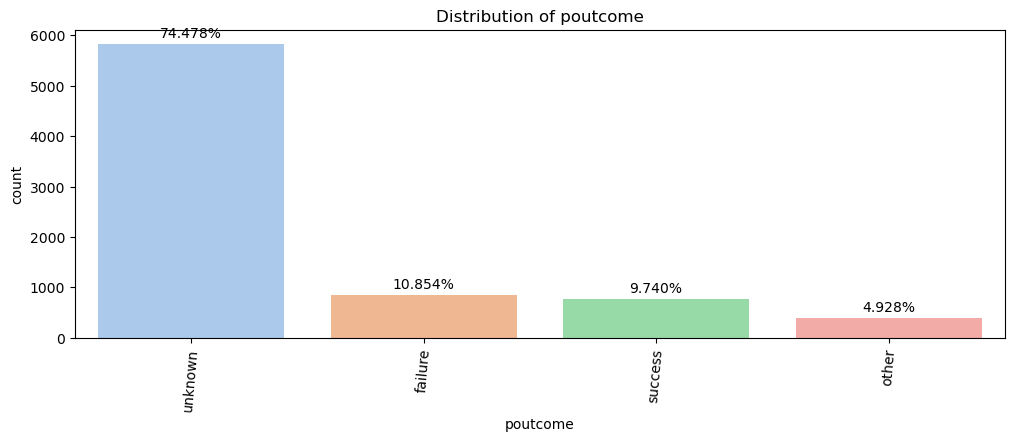

In [10]:
# Assuming df_train is your DataFrame
categoric_feat = df.select_dtypes(include='object').columns.drop('deposit')

for x in categoric_feat:
    count_values = df[x].value_counts(ascending=False)
    
    if len(count_values) > 1:
        plt.figure(figsize=(12, 4), dpi=100)
        ax = sns.countplot(data=df, x=x, order=count_values.index, palette='pastel')
        plt.xticks(rotation=85, fontsize=10)
        
        # Calculate relative values as percentages
        rel_values = count_values.values / len(df) * 100
        lbls = [f'{p:1.3f}%' for p in rel_values]
        
        # Manually add bar labels
        for i, p in enumerate(ax.patches):
            ax.annotate(lbls[i], (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

        plt.title(f'Distribution of {x}')
        plt.show()
    else:
        print(f"Skipping plot for '{x}' as it has only one unique value.")


**Insights** :

- **Job** : Management (22.94%) is the most common job category in the dataset, followed by blue-collar (17.23%) and technician (16.52%). These three categories together make up more than half of the total job distribution.
- **Housing** : A small majority of customers (52.99%) do not have housing loans, while 47.01% of customers do.
- **Loan** :  A high majority of customers (86.89%) do not have personal loans, while 13.11% of customers do.
- **Contact** : Cellular (72.03%): The majority of customers were contacted via cellular phones.
- **Month** : May (25.29%): Most of the campaigns took place in May.
- **Poutcome** : Unknown (74.48%): The outcome of previous campaigns is unknown for a large majority of customers.

## Label Analysis

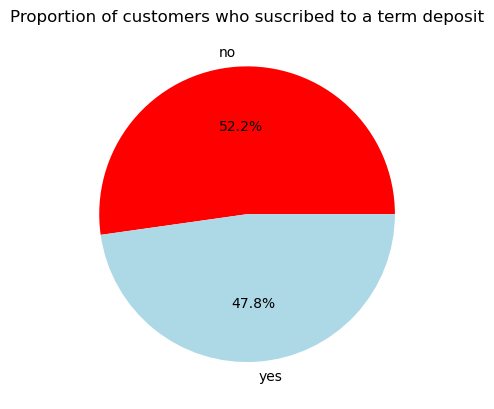

In [11]:
train_agg=df['deposit'].value_counts(normalize=1).reset_index()
train_agg['percentage']=100*train_agg['proportion']
train_agg

plt.pie(data=train_agg,x='percentage',labels=['no','yes'], autopct='%1.1f%%',textprops=dict(color="black"),colors=['red','lightblue'])
plt.title('Proportion of customers who suscribed to a term deposit')
plt.show()

**Insights:**
- Yes (Subscribed a Term Deposit): 47.8% of customers have subscribed to a term deposit, indicating slightly more than half of the customer opted to deposit.
- No (Not Subscribed): 52.2% of customers did not invest to a term deposit.

**Conclusion:**

The dataset is fairly balanced between the two classes, with a slight majority in favor of those who did not invest to the term deposit. This suggests that the model will have a decent amount of data from both classes, which is important for training classification models and avoiding bias towards either class.

## Correlation Analysis

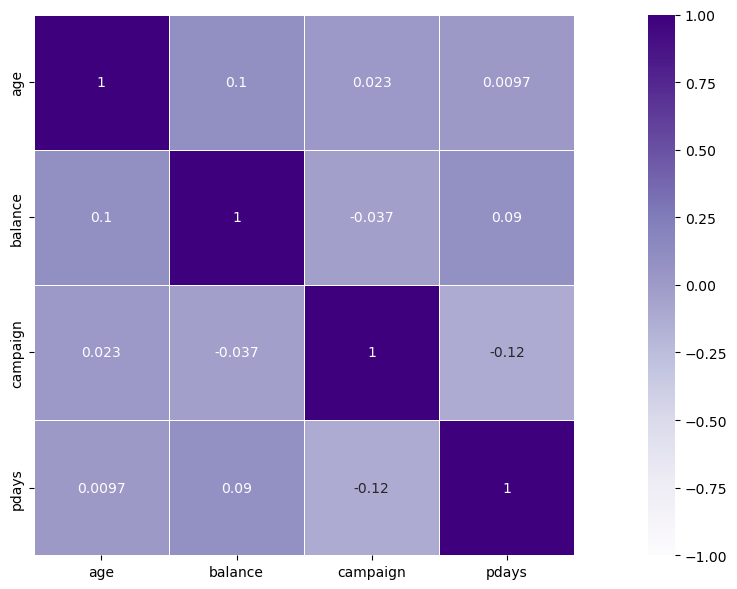

In [12]:
corr = df.select_dtypes(include='number').corr(method='spearman')
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, center=0, vmin=-1, square=True, linewidths=.5,cmap='Purples')
plt.tight_layout()
plt.show()

**Insights :**

There are very weak correlation between all numerical variables.

## Split Data

In [13]:
# define features
X=df.drop('deposit',axis=1)

# define label
y=df['deposit']

In [14]:
#split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
display(X_train.shape,X_test.shape)

(6250, 10)

(1563, 10)

In [15]:
# merge X_train and y_train to create df_train
df_train = pd.concat([X_train,y_train],axis=1)
df_train

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
1459,56,management,563,yes,no,cellular,may,2,168,failure,no
3231,32,technician,390,yes,no,unknown,may,1,-1,unknown,no
2502,30,admin.,69,yes,no,cellular,apr,1,-1,unknown,yes
4107,31,services,-205,no,no,cellular,sep,1,579,failure,yes
3994,34,admin.,-312,yes,no,unknown,may,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
2640,23,services,279,yes,no,cellular,may,1,370,failure,yes
6831,32,technician,267,no,no,cellular,may,1,-1,unknown,no
3248,35,technician,33,no,no,cellular,aug,2,-1,unknown,no
6736,32,housemaid,10,yes,no,unknown,jun,2,-1,unknown,no


In [16]:
# merge X_train and y_train to create df_train
df_test = pd.concat([X_test,y_test],axis=1)
df_test

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2266,32,management,-383,yes,no,unknown,may,1,-1,unknown,no
7393,37,services,608,no,no,cellular,may,3,-1,unknown,no
1541,31,admin.,-422,yes,no,cellular,may,2,329,other,no
1426,30,blue-collar,128,yes,no,unknown,may,1,-1,unknown,no
2454,56,management,7747,no,no,unknown,jun,2,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
1229,41,technician,30,yes,no,cellular,jul,1,-1,unknown,no
592,30,management,398,no,no,cellular,apr,2,-1,unknown,yes
5555,45,management,80,no,yes,cellular,nov,1,-1,unknown,no
6421,46,admin.,5511,no,no,cellular,jul,2,389,success,yes


# Data Wrangling and Feature Engineering

## Handling Duplicated Data

In [17]:
# check duplicates
df_train.duplicated().sum()

5

In [18]:
df_train[df_train.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4935,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes
330,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no


Dropping duplicated data since there are very few of them.

In [19]:
# drop duplicates
df_train=df_train.drop_duplicates()

In [20]:
# check data shape after drop duplicates
df_train.shape

(6245, 11)

## Handling Missing Values

In [21]:
# Replacing the unknown values with NaN across all the dataset
df_train = df_train.replace('unknown', np.nan)

In [22]:
# Also do the same thing to test data
df_test = df_test.replace('unknown', np.nan)

In [23]:
# Checking for number of null values
df_null=pd.DataFrame({'columns':df_train.columns,'n_null_values':df_train.isna().sum(),'%_null_values':round(df_train.isna().sum()*100/len(df_train),2)})
df_null.set_index('columns').sort_values(by='%_null_values', ascending = False)

,n_null_values,%_null_values
columns,,
poutcome,4645,74.38
contact,1311,20.99
job,39,0.62
age,0,0.00
balance,0,0.00
housing,0,0.00
loan,0,0.00
month,0,0.00
campaign,0,0.00


**Insights :**
- The poutcome column has 74.38% null values, with 4645 missing records.
- The contact column has 20.99% null values, which accounts for 1311 missing records.
- The job column has 0.62% null values, or 39 missing records.
- The remaining columns, including key features like age, balance, housing, loan, month, campaign, pdays, and deposit, have 0% null values.

In [24]:
# Checking categoric features whose having null values

categoric_feat_null=['poutcome','contact','job']

# Checking uniques values in each features
for feat in categoric_feat_null:
    print(df_train[feat].value_counts())
    print('--'*45)

poutcome
failure    695
success    607
other      298
Name: count, dtype: int64
------------------------------------------------------------------------------------------
contact
cellular     4506
telephone     428
Name: count, dtype: int64
------------------------------------------------------------------------------------------
job
management       1430
blue-collar      1097
technician       1039
admin.            768
services          523
retired           428
self-employed     222
unemployed        196
student           192
entrepreneur      185
housemaid         126
Name: count, dtype: int64
------------------------------------------------------------------------------------------


In [25]:
df_train['job'] = df_train['job'].replace('admin.', 'admin')
df_train['job'].unique()

array(['management', 'technician', 'admin', 'services', 'entrepreneur',
       'student', 'blue-collar', 'retired', 'housemaid', 'self-employed',
       nan, 'unemployed'], dtype=object)

In [26]:
df_test['job'] = df_test['job'].replace('admin.', 'admin')
df_test['job'].unique()

array(['management', 'services', 'admin', 'blue-collar', 'technician',
       'retired', 'student', 'self-employed', 'entrepreneur', 'housemaid',
       'unemployed', nan], dtype=object)

## Handling Outliers

In [27]:
# Using Inter Quartile Range (IQR) for removing outliers from numerical features

# Defining numerical features with outliers
outlier_feat=['age', 'balance', 'campaign', 'pdays']

# Capping dataset
for i in outlier_feat:
    # Findling IQR
    Q1=df_train[i].quantile(0.25)
    Q3=df_train[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower bound
    lower_bound =df_train[i].quantile(0.25)-1.5*IQR
    upper_bound =df_train[i].quantile(0.75)+1.5*IQR

    # Drop outliers
    df_train.loc[(df_train[i] > upper_bound),i] = upper_bound
    df_train.loc[(df_train[i] < lower_bound),i] = lower_bound

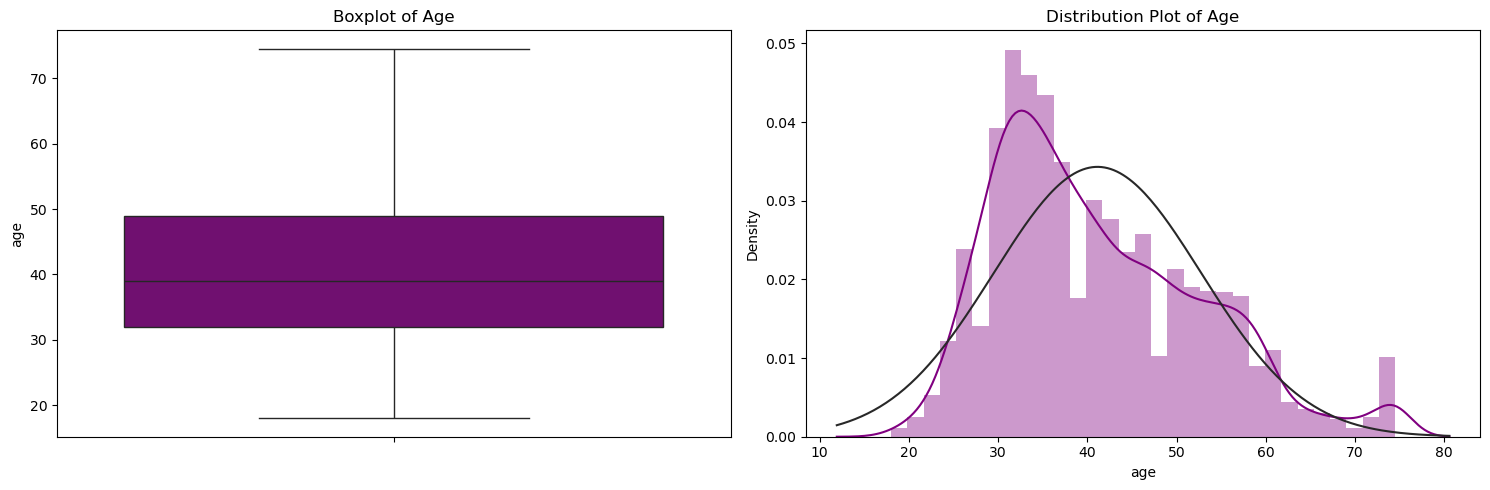

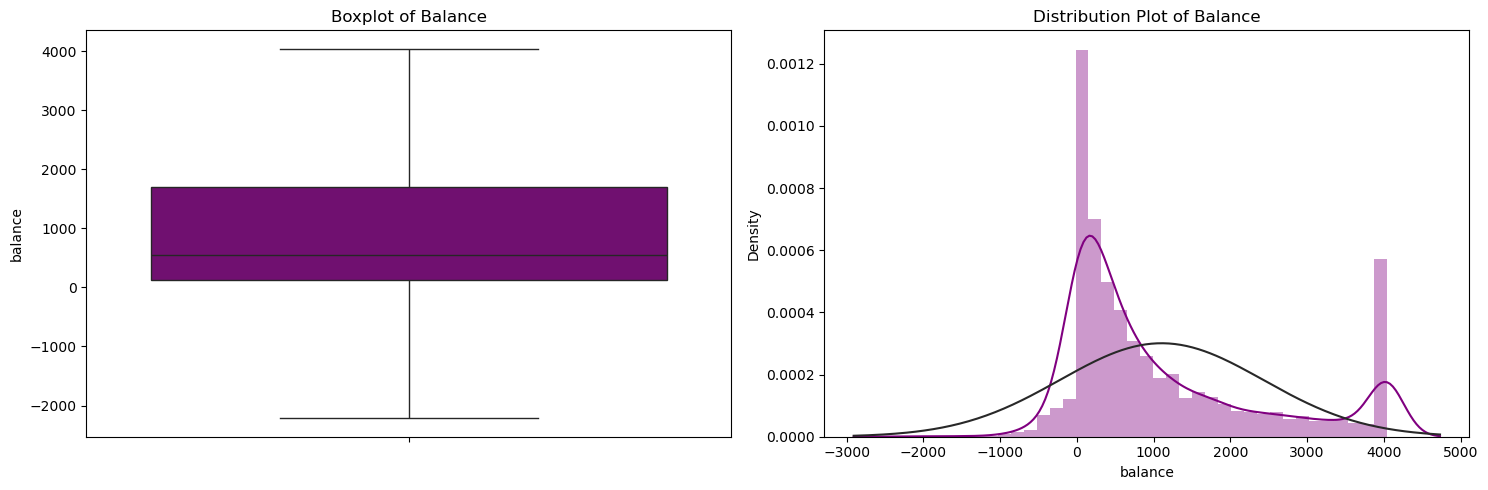

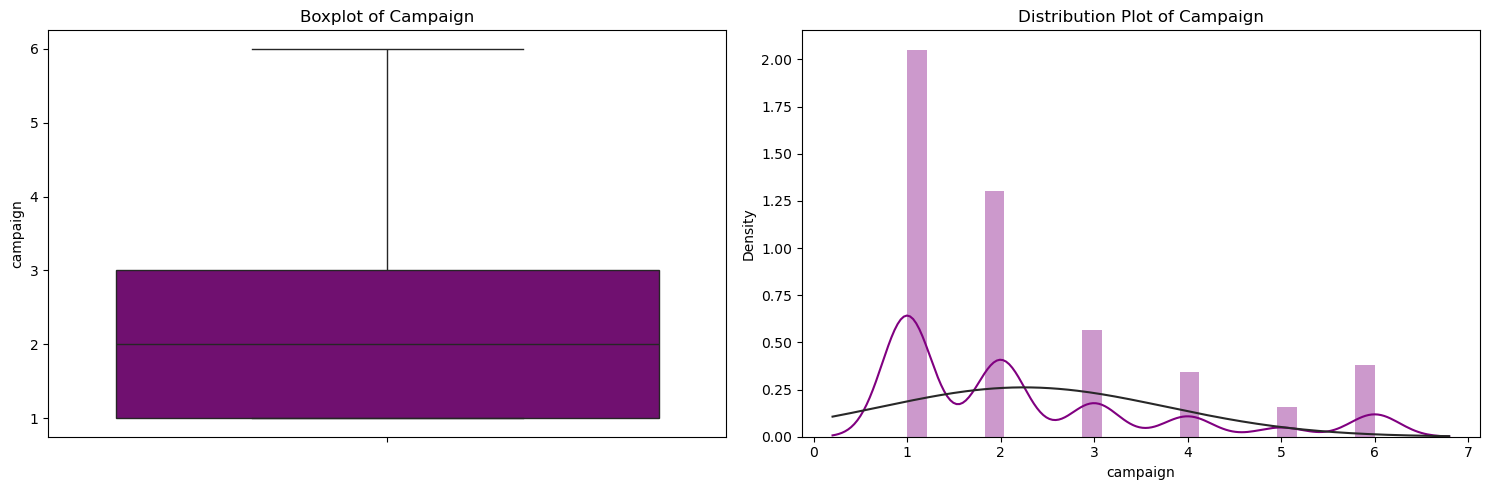

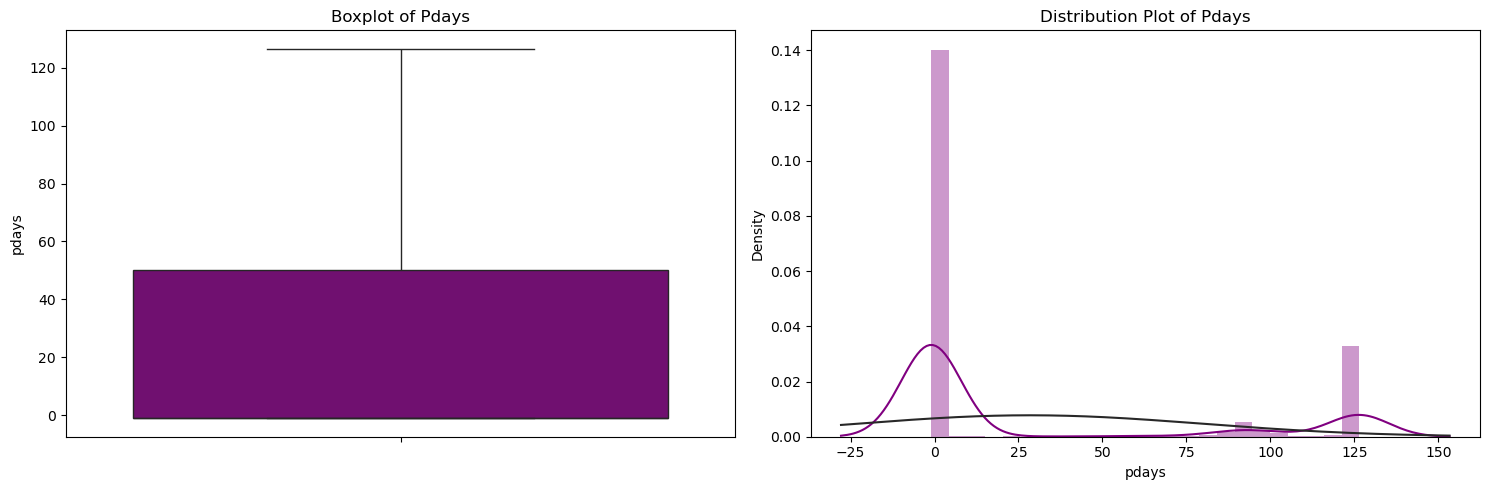

In [28]:
# Checking outliers in features after dropping

for feat in outlier_feat:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df_train[feat],color='purple')
    ax.set_title(f'Boxplot of {feat.title()}')
    ax.set_ylabel(feat)

    plt.subplot(1,2,2)
    ax=sns.distplot(df_train[feat], fit=norm,color='purple')
    ax.set_title(f'Distribution Plot of {feat.title()}')
    ax.set_xlabel(feat)

    plt.tight_layout()
    plt.show()

Outliers are successfully removed from the dataset.

## Handling Categorical Variables

In [29]:
# Addresing categorical features
categorical_feat=df_train.select_dtypes(include='object').columns
categorical_feat

Index(['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'], dtype='object')

In [30]:
# Checking categories in each categorical features
for feat in categorical_feat:
    print(df_train[feat].value_counts())
    print('__'*45)

job
management       1430
blue-collar      1097
technician       1039
admin             768
services          523
retired           428
self-employed     222
unemployed        196
student           192
entrepreneur      185
housemaid         126
Name: count, dtype: int64
__________________________________________________________________________________________
housing
no     3320
yes    2925
Name: count, dtype: int64
__________________________________________________________________________________________
loan
no     5415
yes     830
Name: count, dtype: int64
__________________________________________________________________________________________
contact
cellular     4506
telephone     428
Name: count, dtype: int64
__________________________________________________________________________________________
month
may    1595
aug     869
jul     818
jun     696
nov     532
apr     517
feb     423
oct     219
jan     182
sep     180
mar     157
dec      57
Name: count, dtype: int64
_____

In [31]:
# Mapping the label (deposit) 
df_train['deposit'] = np.where(df_train['deposit']=='yes',1,0)
df_test['deposit'] = np.where(df_test['deposit']=='yes',1,0)

**Insights**

With only a few categories for the categorical variables job, housing, loan, contact, poutcome encoding can be applied. **One Hot Encoder** can be used for the categorical variables job and month, as they have numerous categories.

## Feature Scaling

Because the data is not normally distributed and contains outliers, we choose **Robust Scaler** as the scaler for numerical features. The RobustScaler is specifically designed for data that is not normally distributed and contains outliers. Unlike the StandardScaler, which standardizes data based on the mean and standard deviation, the RobustScaler scales data according to the interquartile range (IQR), which is less sensitive to outliers.

## Transformation Pipelines

In [32]:
categorical_features = ['job', 'housing', 'loan', 'contact', 'poutcome','month']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

numerical_features = ['age','balance', 'pdays','campaign']
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])   

In [33]:
# Combine transformers into a single preprocessor
transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)

## Define Features and Label

In [34]:
# Features and Label train dataset
X_train=df_train.drop('deposit',axis=1)
y_train=df_train['deposit']

# Features and Label test dataset
X_test=df_test.drop('deposit',axis=1)
y_test=df_test['deposit']

# Modelling

## Default Hyperparameter & Cross Validation

In [35]:
pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('classifier', RandomForestClassifier())  # Placeholder untuk classifier
])

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42),
                       DecisionTreeClassifier(random_state=42),
                       LogisticRegression(random_state=42),
                       XGBClassifier(random_state=42)],
    },
]

# Create GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1',error_score="raise")

# Measure the fitting time
start_time = time.time()

# Fit GridSearchCV to data
gscv.fit(X_train, y_train)

end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 17.71 seconds


In [36]:
# Get the best F1 Score
gscv.best_score_

0.6457983041114412

In [37]:
# Get the best parameters
gscv.best_params_

{'classifier': RandomForestClassifier(random_state=42)}

In [38]:
# Get the best estimator
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'balance', 'pdays',
                                                   'campaign']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'month'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [39]:
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.638575,0.292110,0.079740,0.012684,RandomForestClassifier(random_state=42),{'classifier': RandomForestClassifier(random_state=42)},0.651449,0.653321,0.638522,0.647059,0.638640,0.645798,0.006234,1
3,0.208392,0.012456,0.026561,0.003416,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=42, ...)","{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=42, ...)}",0.635209,0.643911,0.628623,0.635231,0.624319,0.633459,0.006669,2
2,0.102159,0.012383,0.015695,0.004181,LogisticRegression(random_state=42),{'classifier': LogisticRegression(random_state=42)},0.623202,0.646947,0.612086,0.622982,0.617021,0.624448,0.011982,3
1,0.220234,0.011904,0.018653,0.003311,DecisionTreeClassifier(random_state=42),{'classifier': DecisionTreeClassifier(random_state=42)},0.607679,0.602990,0.579125,0.601814,0.583051,0.594932,0.011540,4


In [40]:
# Assuming gscv is your GridSearchCV object
results_df = pd.DataFrame(gscv.cv_results_)

# Select relevant columns
results_df = results_df[['params', 'mean_test_score', 'std_test_score']]

# Sort by rank_test_score if you want
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Display the filtered results
results_df

,params,mean_test_score,std_test_score
0,{'classifier': RandomForestClassifier(random_state=42)},0.645798,0.006234
3,"{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=42, ...)}",0.633459,0.006669
2,{'classifier': LogisticRegression(random_state=42)},0.624448,0.011982
1,{'classifier': DecisionTreeClassifier(random_state=42)},0.594932,0.011540


**Interpretation** :

The Random Forest model produces the highest mean f1-score.

In [41]:
y_pred_train=gscv.best_estimator_.predict(X_train)
y_pred=gscv.best_estimator_.predict(X_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3262
           1       1.00      1.00      1.00      2983

    accuracy                           1.00      6245
   macro avg       1.00      1.00      1.00      6245
weighted avg       1.00      1.00      1.00      6245

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       816
           1       0.70      0.63      0.66       747

    accuracy                           0.69      1563
   macro avg       0.69      0.69      0.69      1563
weighted avg       0.69      0.69      0.69      1563



**Interpretation** :

- Training Set:

F1-score for class 0: 1.00

F1-score for class 1: 1.00

This indicates the model performed perfectly on the training data, suggesting potential overfitting.

- Test Set:

F1-score for class 0: 0.72

F1-score for class 1: 0.66

These values are much lower, highlighting that the model doesn't generalize well. The drop from training suggests the model is overfitting and needs regularization or tuning.

## Hyperparameter Tuning & Cross Validation

In [42]:
pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('classifier', RandomForestClassifier())  # Placeholder untuk classifier
])

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [2,4,6,8],
        'classifier__min_samples_split': [2,10,20],
        'classifier__n_estimators': [100, 200, 500],
        'classifier__class_weight': [None, 'balanced']
        
    }
    
]

# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1',error_score="raise")

# Measure the fitting time
start_time = time.time()

# Fit GridSearchCV ke data
gscv.fit(X_train, y_train)

end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 440.52 seconds


In [43]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'balance', 'pdays',
                                                   'campaign']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'month'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=6,
                                        min_samples_split=10,
                                        random_state=42))])

In [44]:
# Get the best F1 Score
gscv.best_score_

0.6499145197997452

In [45]:
gscv.best_params_

{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=6, min_samples_split=10, random_state=42),
 'classifier__class_weight': 'balanced',
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 100}

In [46]:
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__class_weight,param_classifier__criterion,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
129,1.023355,0.045018,0.052081,0.003838,"RandomForestClassifier(class_weight='balanced', criterion='entropy',\n max_depth=6, min_samples_split=10, random_state=42)",balanced,entropy,6,10,100,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}",0.646018,0.673413,0.639775,0.660808,0.629559,0.649915,0.015513,1
106,2.573758,0.041388,0.109155,0.018649,"RandomForestClassifier(class_weight='balanced', criterion='entropy',\n max_depth=6, min_samples_split=10, random_state=42)",balanced,gini,8,20,200,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 200}",0.656908,0.673605,0.632672,0.661232,0.620890,0.649061,0.019361,2
95,4.350887,0.093458,0.218375,0.010579,"RandomForestClassifier(class_weight='balanced', criterion='entropy',\n max_depth=6, min_samples_split=10, random_state=42)",balanced,gini,6,10,500,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 6, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 500}",0.651746,0.669152,0.634508,0.659593,0.627973,0.648595,0.015344,3
143,5.945273,0.474226,0.203971,0.035781,"RandomForestClassifier(class_weight='balanced', criterion='entropy',\n max_depth=6, min_samples_split=10, random_state=42)",balanced,entropy,8,20,500,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 500}",0.651334,0.667302,0.635849,0.663043,0.625120,0.648530,0.015998,4
107,5.757055,0.142674,0.227310,0.019505,"RandomForestClassifier(class_weight='balanced', criterion='entropy',\n max_depth=6, min_samples_split=10, random_state=42)",balanced,gini,8,20,500,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 500}",0.651893,0.672348,0.634652,0.661232,0.622478,0.648521,0.017951,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1.019741,0.033526,0.090731,0.008478,"RandomForestClassifier(class_weight='balanced', criterion='entropy',\n max_depth=6, min_samples_split=10, random_state=42)",None,entropy,2,10,200,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}",0.530522,0.543800,0.502273,0.536806,0.504525,0.523585,0.017024,139
37,1.041312,0.056910,0.084002,0.002713,"RandomForestClassifier(class_weight='balanced', criterion='entropy',\n max_depth=6, min_samples_split=10, random_state=4

In [47]:
# Assuming gscv is your GridSearchCV object
results_df = pd.DataFrame(gscv.cv_results_)

# Select relevant columns
results_df = results_df[['params', 'mean_test_score', 'std_test_score']]

# Sort by rank_test_score if you want
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Display the filtered results
results_df

,params,mean_test_score,std_test_score
129,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}",0.649915,0.015513
106,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 200}",0.649061,0.019361
95,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 6, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 500}",0.648595,0.015344
143,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 500}",0.648530,0.015998
107,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 500}",0.648521,0.017951
...,...,...,...
43,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 200}",0.523585,0.017024
40,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}",0.523585,0.017024
7,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 200}",0.520798,0.016426
4,"{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=6, min_samples_split=10, random_state=42), 'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}",0.520798,0.016426


**Interpretation** :

The RandomForestClassifier(class_weight='balanced', criterion='entropy',max_depth=6, min_samples_split=10, random_state=42) model produces the highest mean f1-score.e.

In [48]:
y_pred_train=gscv.best_estimator_.predict(X_train)
y_pred=gscv.best_estimator_.predict(X_test)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      3262
           1       0.72      0.62      0.67      2983

    accuracy                           0.70      6245
   macro avg       0.71      0.70      0.70      6245
weighted avg       0.71      0.70      0.70      6245

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       816
           1       0.73      0.64      0.68       747

    accuracy                           0.71      1563
   macro avg       0.71      0.71      0.71      1563
weighted avg       0.71      0.71      0.71      1563



**Insights**

Overall, the F1 scores are comparable between the training and testing datasets, with slight improvements in the testing set. This indicates that the model is performing consistently and may have potential for further enhancement, particularly in class 1.

## Threshold Adjustment

In [49]:
# Assuming is your Random Forest model
model = gscv.best_estimator_

# Fit the model
model.fit(X_train, y_train)

# Generate probabilities for the positive class (1)
y_prob = model.predict_proba(X_test)[:, 1]

# Define threshold values
th_value = [i / 100 for i in range(1, 99)]
score_list = []

# Loop through each threshold value and calculate F1 score
for threshold in th_value:
    y_pred = np.where(y_prob > threshold, 1, 0)  # Apply threshold
    score_temp = f1_score(y_test, y_pred)  # Calculate F1 score
    score_list.append(score_temp)

# Create a DataFrame to store threshold values and corresponding F1 scores
th_f1 = pd.DataFrame({
    'th_value': th_value,
    'f1_score': score_list
})

# Sort the DataFrame by F1 score in descending order
th_f1 = th_f1.sort_values("f1_score", ascending=False)
th_f1

,th_value,f1_score
47,0.48,0.684390
46,0.47,0.682763
42,0.43,0.682530
50,0.51,0.681752
45,0.46,0.681698
...,...,...
93,0.94,0.021108
94,0.95,0.007989
95,0.96,0.000000
96,0.97,0.000000


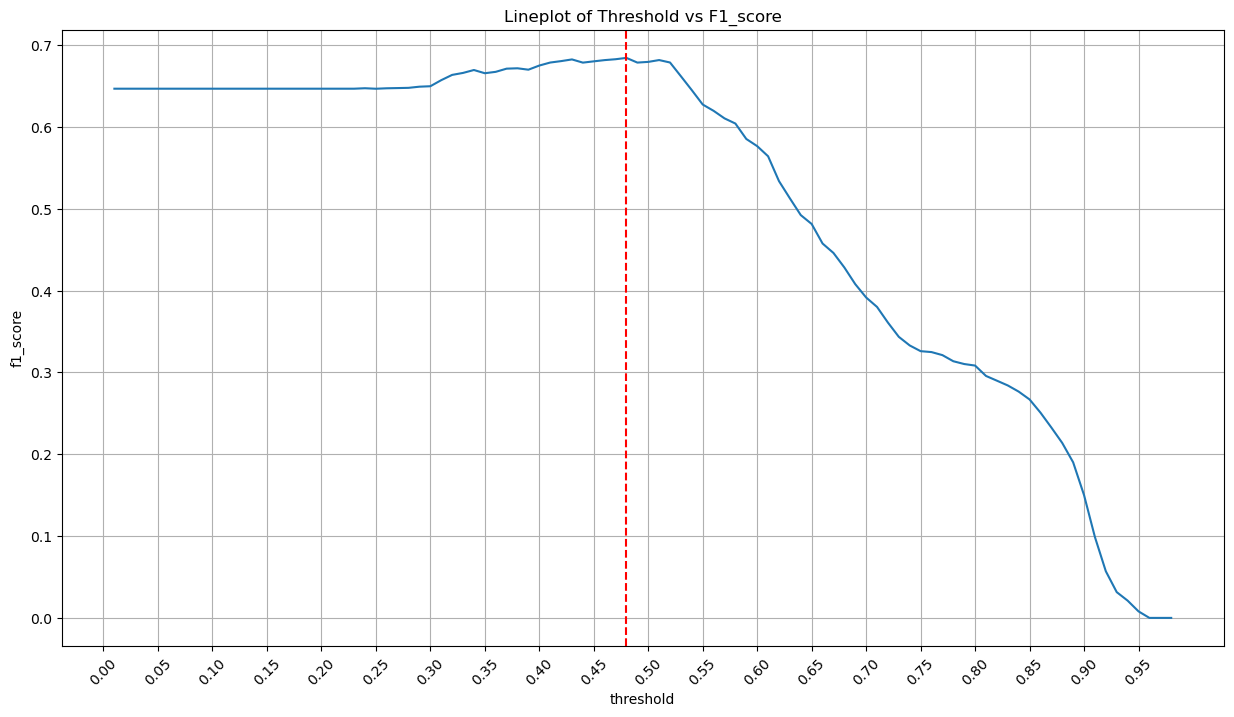

In [50]:
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.ylabel("f1_score")
plt.xlabel("threshold")
plt.title("Lineplot of Threshold vs F1_score")
plt.axvline(x=th_f1.head(1)["th_value"].values, linestyle='--',color='red')
plt.show()

In [51]:
y_prob=model.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>th_f1.head(1)["th_value"].values,1,0)

In [52]:
final_model_actual_pred_y = pd.DataFrame({
    "actual":y_test,
    "pred":y_pred
})
final_model_actual_pred_y 

,actual,pred
2266,0,0
7393,0,0
1541,0,0
1426,0,0
2454,0,1
...,...,...
1229,0,0
592,1,1
5555,0,0
6421,1,1


In [53]:
confusion_matrix_final= final_model_actual_pred_y.groupby('actual')['pred'].value_counts().reset_index()
confusion_matrix_final

,actual,pred,count
0,0,0,598
1,0,1,218
2,1,1,502
3,1,0,245


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       816
           1       0.70      0.67      0.68       747

    accuracy                           0.70      1563
   macro avg       0.70      0.70      0.70      1563
weighted avg       0.70      0.70      0.70      1563



**Interpretation**

Overall the Threshold Adjustment Random Forest Model has better F1 Score than the hyperparameter tuning model. So this will be the final model.

## Feature Importances

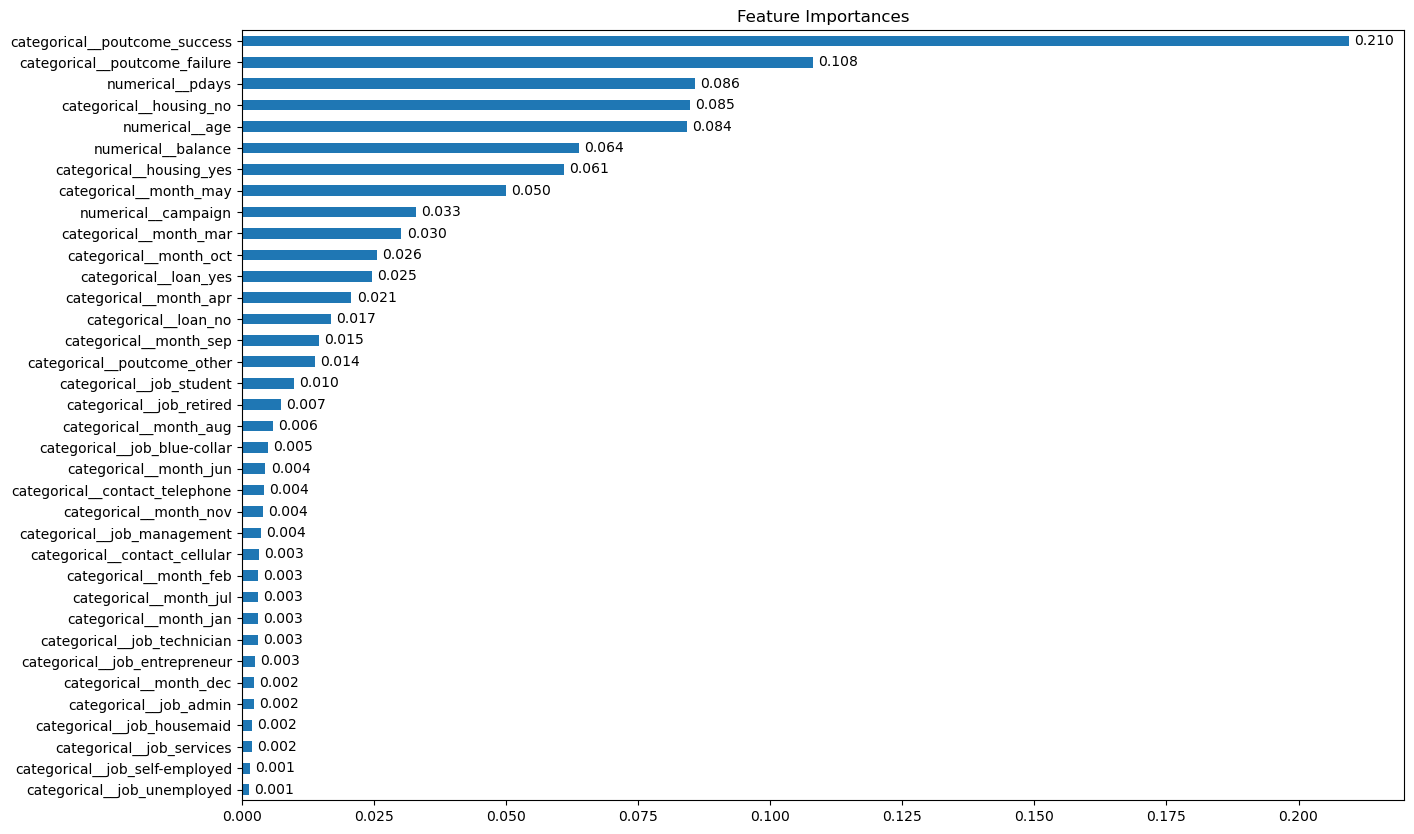

In [55]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Access the final estimator in the pipeline
final_estimator = best_estimator.named_steps['classifier']

# Get the feature importances from the final estimator
feature_importances = final_estimator.feature_importances_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Create a Series with feature importances and sort it
model_coef = pd.Series(feature_importances, index=feature_names).sort_values()

# Plot the feature importances
plt.figure(figsize=(15, 10))
ax = model_coef.plot(kind='barh', title='Feature Importances')


# Add annotations to the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  # position x (at the end of the bar)
            i.get_y() + i.get_height() / 2,  # position y (middle of the bar)
            f'{i.get_width():.3f}',  # text to display (feature importance value)
            ha='left',  # horizontal alignment (left align)
            va='center')  # vertical alignment (center align)
plt.show()

**Insights** :

- **Outcome of Previous Campaign (categorical__poutcome_success and categorical__poutcome_failure)**:

The success or failure of previous marketing outcomes is the most important feature, indicating that customers with a successful past outcome are much more likely to invest to term deposit, and those with a failed outcome are less likely.

- **Number of Days Passed Since Last Campaign Contact (numerical__pdays)**:

The number of days since a customer was last contacted is the third most important feature, with a higher influence, likely reflecting that recently contacted customers are more likely to invest.

- **Housing Loan Status (categorical__housing_no and categorical__housing_yes)**:

Whether a customer has a housing loan also plays a significant role, indicating financial obligations could affect their likelihood of investing to a term deposit.

- **Age and Balance (numerical__age and numerical__balance)**:

Customer age and balance are moderately important, implying that wealthier and potentially older customers are more likely to invest.

- **Month of Contact**:

Certain months like May (categorical__month_may) have some importance, suggesting the timing of the campaign affects its success.

- **Other Features**:

Some features, such as job type (categorical__job) or loan status (categorical__loan), have less importance, implying they are not as significant in predicting term deposit investment likelihood.

## Model Limitation

Since this model is the result of the training on train dataset, the model can only work well in a certain range. Here are the limits of data that can be accepted by the model to predict.

In [56]:
df_train.describe()

,age,balance,campaign,pdays,deposit
count,6245.000000,6245.000000,6245.000000,6245.000000,6245.000000
mean,41.139151,1103.715612,2.247398,28.381665,0.477662
std,11.630000,1326.507725,1.525292,51.365002,0.499541
min,18.000000,-2214.500000,1.000000,-1.000000,0.000000
25%,32.000000,130.000000,1.000000,-1.000000,0.000000
50%,39.000000,556.000000,2.000000,-1.000000,0.000000
75%,49.000000,1693.000000,3.000000,50.000000,1.000000
max,74.500000,4037.500000,6.000000,126.500000,1.000000


In [57]:
columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome']
values = []
nunique_list = []
for i in columns:
    value = df_train[i].unique()
    nunique = df_train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values
}))

,columns,values
0,job,"[management, technician, admin, services, entrepreneur, student, blue-collar, retired, housemaid, self-employed, nan, unemployed]"
1,housing,"[yes, no]"
2,loan,"[no, yes]"
3,contact,"[cellular, nan, telephone]"
4,month,"[may, apr, sep, jun, nov, aug, jul, oct, dec, mar, jan, feb]"
5,poutcome,"[failure, nan, other, success]"


| Feature    | Limitation                                                                |
|------------|-----------------------------------------------------------------------------|
| age        | 18 to 74.5 years                                                    |
| job        | management, technician, admin, services, entrepreneur, student, blue-collar, retired, housemaid, self-employed, unemployed|
| balance    | -2214 to  4037                |
| housing    | has a housing loan or not                           |
| loan       | has a personal loan or not                          |
| contact    | cellular, telephone|
| month      | all month in a year            |
| campaign   | 1 to 6 times contacts performed during this campaign     |
| pdays      | no prior contact (-1) to 124 days |
| poutcome   | success, failure, other |

## Fit Final Model

In [58]:
#Concat train and test features data
X_final = pd.concat([X_train,X_test])
X_final

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
1459,56.0,management,563.0,yes,no,cellular,may,2,126.5,failure
3231,32.0,technician,390.0,yes,no,NaN,may,1,-1.0,NaN
2502,30.0,admin,69.0,yes,no,cellular,apr,1,-1.0,NaN
4107,31.0,services,-205.0,no,no,cellular,sep,1,126.5,failure
3994,34.0,admin,-312.0,yes,no,NaN,may,1,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1229,41.0,technician,30.0,yes,no,cellular,jul,1,-1.0,NaN
592,30.0,management,398.0,no,no,cellular,apr,2,-1.0,NaN
5555,45.0,management,80.0,no,yes,cellular,nov,1,-1.0,NaN
6421,46.0,admin,5511.0,no,no,cellular,jul,2,389.0,success


In [59]:
y_final = pd.concat([y_train,y_test])
y_final

1459    0
3231    0
2502    1
4107    1
3994    0
       ..
1229    0
592     1
5555    0
6421    1
1693    0
Name: deposit, Length: 7808, dtype: int32

In [60]:
# Get the best estimator from GridSearchCV
final_model = best_estimator

#Fit model ke fitur data train dan test yang sudah disatukan dan label data train dan test yang telah disatukan
final_model.fit(X_final,y_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'balance', 'pdays',
                                                   'campaign']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'month'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=6,
                                        min_samples_split=10,
                                        random_state=42))])

In [61]:
#Saving models

filename = 'Final_Model_RF.sav'

# # Uncomment code for saving file model

# pickle.dump(best_estimator,open(filename,'wb'))

# Conclusion

Random Forest Classifier Model with Hyperparameter Tuning and Threshold Adjustment has the best performance (highest F1-Score) in predicting whether a customer will make a deposit or not after being contacted by the bank.

# Recommendation

**Model Imporevement**

- **Generate new features**

  Some features like job, month, and contact show minimal importance, which indicates that the model may not be fully leveraging them.
- **Avoid filling data with 'unknown' values**

  
Because the poutcome feature contains a lot of 'unknown' values, wtreat this values as missing valuesvin this modellingng. If the feature will be used in the next modeling process, the value must be filled with 'Success' or 'Failur.

- **Ensemble Methods**

  Implement bagging or other boosting models like Gradient Boosting, AdaBoost, or CatBoost to improve generalization and reduce overfitting.

- **Experiment with Neural Networks**

  Traditional algorithms might miss complex patterns that deep learning could capture.e'u
**Business Recommendation**
- **Diversify Marketing Strategies for New Customers**

  Since previous campaign outcomes (poutcome_success and poutcome_failure) dominate the model, it indicates reliance on customers with prior interactions. However, new customers who haven’t participated in past campaigns may be missed. It is crucial to develop specific strategies targeting new customers or those without prior campaign outcomes.
- **Establish an automated follow-up system for customers**

  The feature pdays (days since last contact) is important, highlighting the recency of contact. Customers who have been contacted recently are more likely to subscribe. So, establish an automated follow-up system for customers contacted within a specific period (e.g., less than 90 days). Customers with older engagement should receive different messaging or offers tailored to re-engage them.

- **Segment customers based on their financial profiles**

  Financial factors such as balance and housing loan status significantly affect the likelihood of subscription. Higher balance customers without housing loans may be more inclined to invest in term deposits. So, segment customers based on their financial profiles and offer personalized term deposit products can be effective. For instance, higher balance customers can be offered higher interest rates or longer-term deposits.isien.